# Import Necessary Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-data/Netflix dataset.csv


# Load the Data

In [2]:
# Load the dataset
file_path = '/kaggle/input/netflix-data/Netflix dataset.csv'
data = pd.read_csv(file_path)

In [3]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Data Cleaning

## Check for Duplicates: If duplicates exist, remove them 

In [6]:
data.duplicated().sum()
# data = data.drop_duplicates()

0

*In the case of this data there are no duplicates so no need to run line 2 from the cell above*

## Handle Missing Values: 

We check for missing values and decide how to handle them (e.g., filling with mean, median, or a placeholder).

In [7]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

<Axes: >

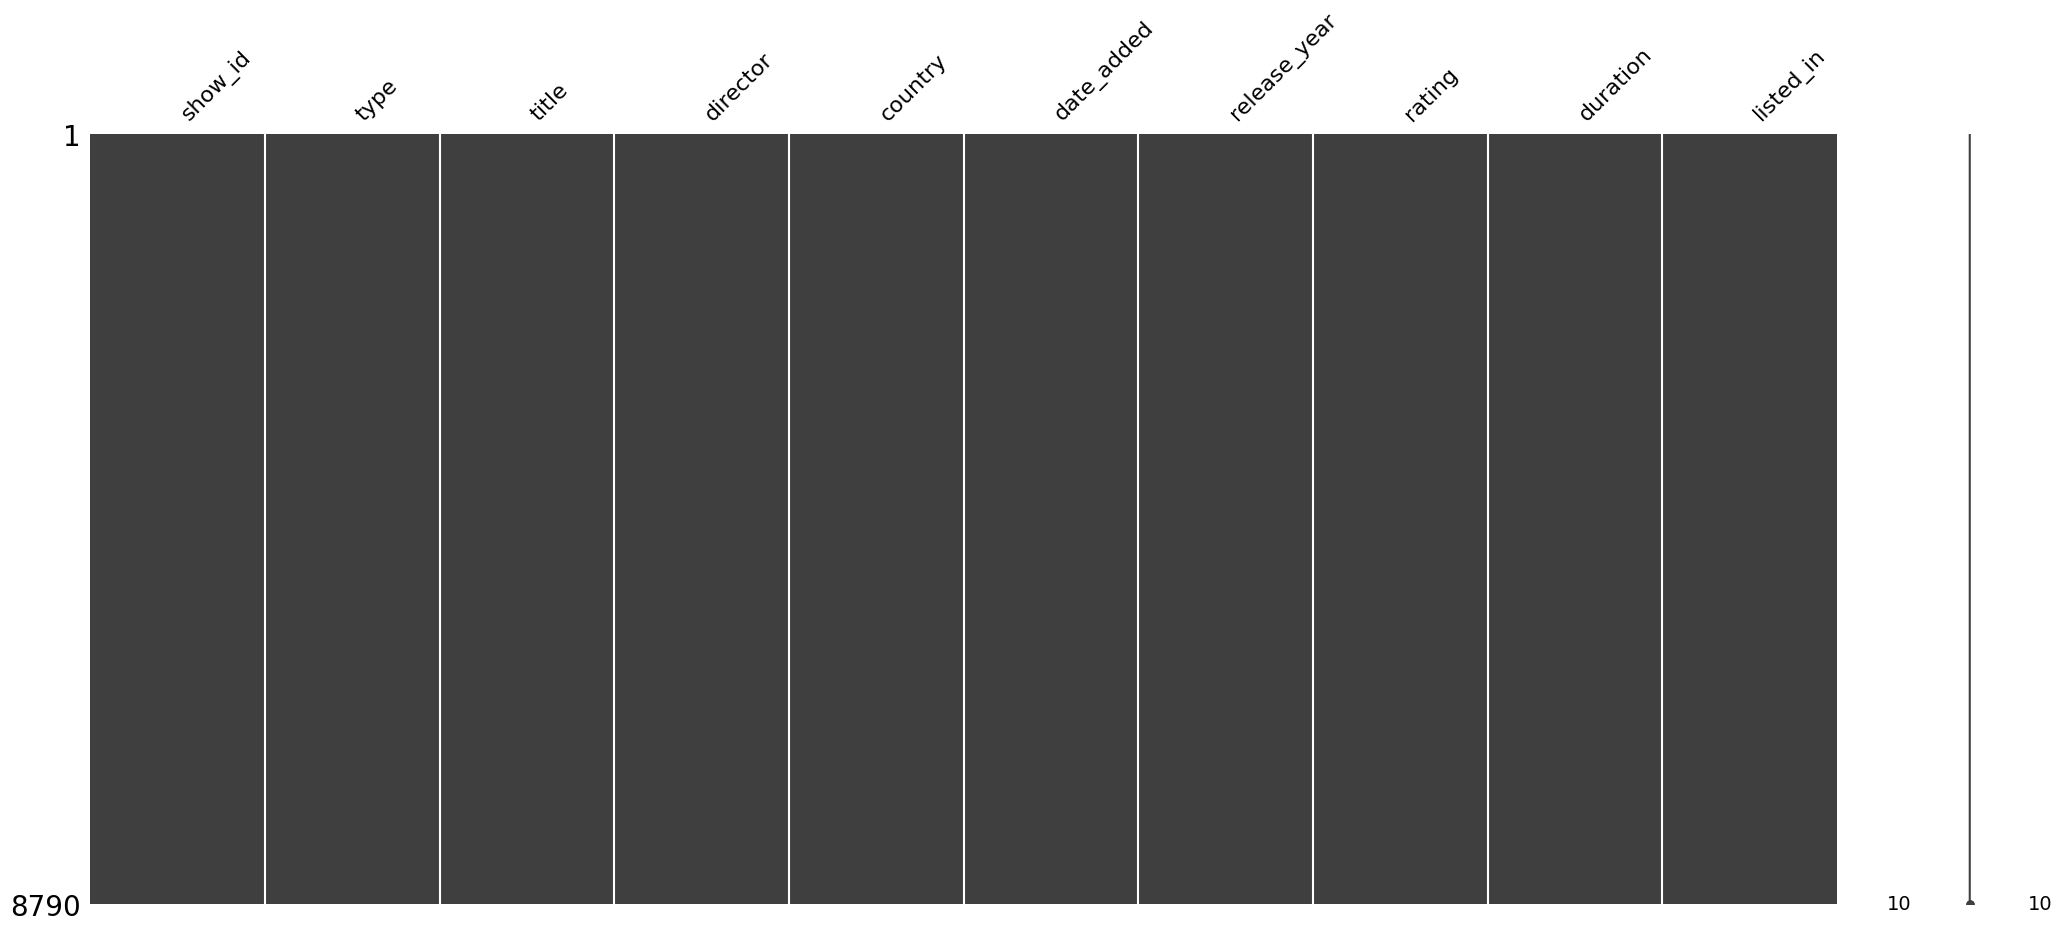

In [8]:
msno.matrix(data)  # Visualize missing data

From the above output and graph we there are no missing values from out dataset.

## Outlier dictection and removal:

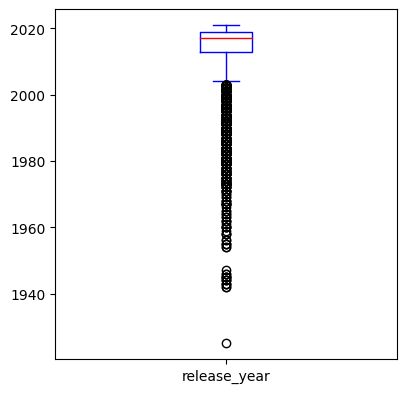

In [9]:
boxplot = data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))

plt.show()

# Exploratory Data Analysis (EDA)

In [10]:
data.drop(data[data["release_year"] == 1925].index, inplace = True)

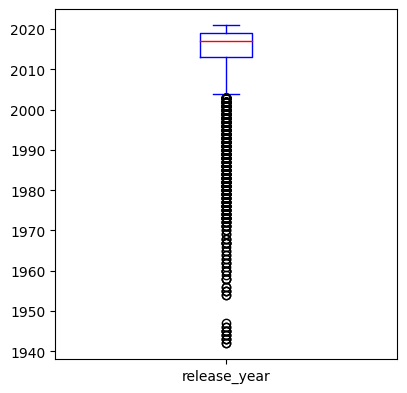

In [11]:
boxplot = data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))

plt.show()

## Descriptive Statistics

In [12]:
data.describe()

,release_year
count,8789.00000
mean,2014.19331
std,8.77454
min,1942.00000
25%,2013.00000
50%,2017.00000
75%,2019.00000
max,2021.00000


## Column Types:

Review column data types and convert as needed (e.g., date columns).

In [13]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['date_added'].info()

<class 'pandas.core.series.Series'>
Index: 8789 entries, 0 to 8789
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
8789 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 137.3 KB


## Descriptive Statistics for Categorical Columns:

In [14]:
data.describe(include="O")

,show_id,type,title,director,country,rating,duration,listed_in
count,8789,8789,8789,8789,8789,8789,8789,8789
unique,8789,2,8786,4528,86,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2587,3240,3205,1790,362


## Data Visualization

## Univariate Analysis:
Histograms for continuous variables and bar plots for categorical variables.

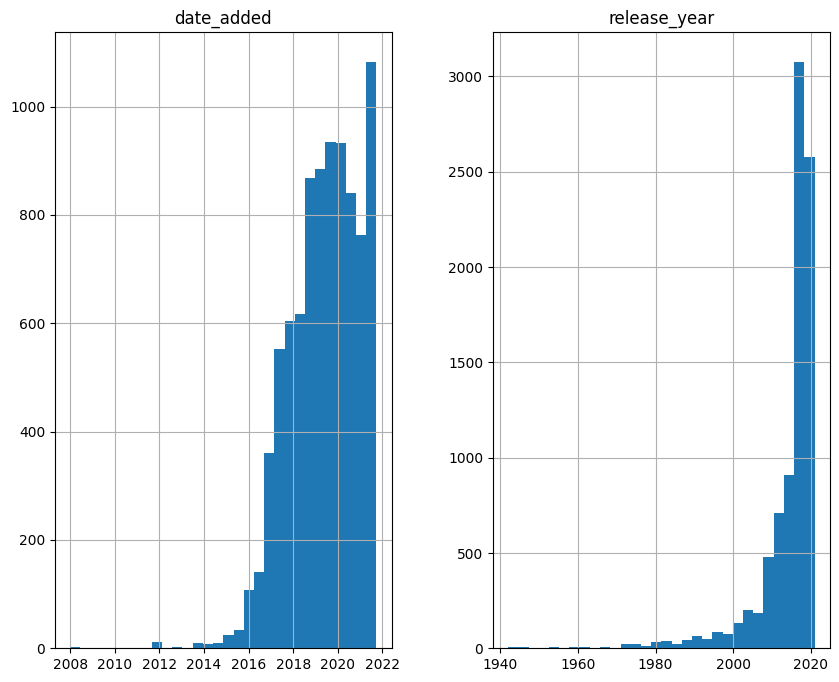

In [15]:
data.hist(bins=30, figsize=(10, 8))
plt.show()

## Most released type per year

In [16]:
# Group data by type and release year
release_type = data.groupby(['release_year', 'type']).size().unstack()
release_type

type,Movie,TV Show
release_year,,
1942,2.0,NaN
1943,3.0,NaN
1944,3.0,NaN
1945,3.0,1.0
1946,1.0,1.0
...,...,...
2017,765.0,265.0
2018,767.0,379.0
2019,633.0,397.0


<Figure size 1200x600 with 0 Axes>

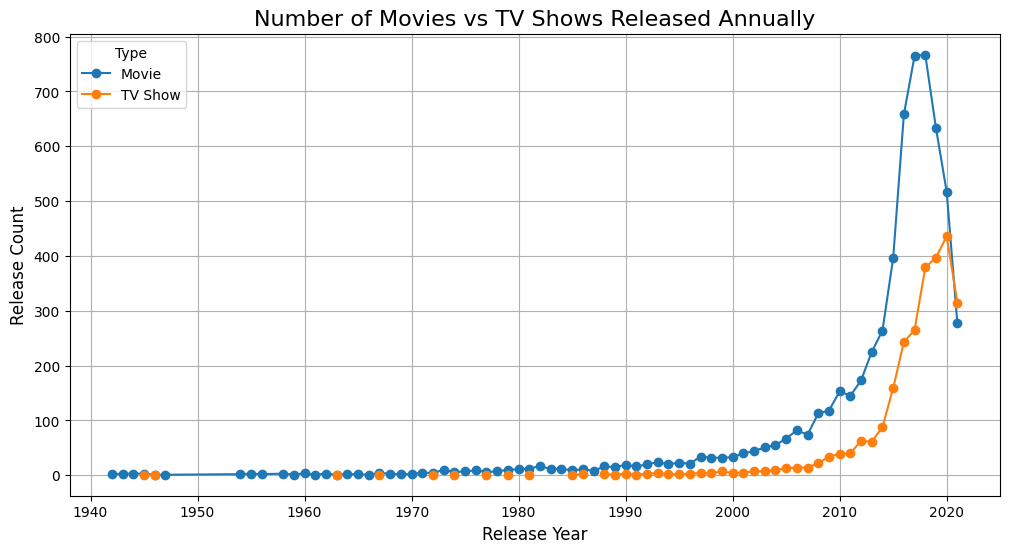

In [17]:
# Plot the trend
plt.figure(figsize=(12, 6))
release_type.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Number of Movies vs TV Shows Released Annually', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Release Count', fontsize=12)
plt.legend(title='Type', fontsize=10)
plt.grid(True)
plt.show()

## Top 10 categories of TV Shows

In [18]:
# Filter for TV shows and count categories
tv_shows = data[data['type'] == 'TV Show']
tv_categories = tv_shows['listed_in'].str.split(', ').explode().value_counts()

In [19]:
tv_shows.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"


In [20]:
tv_categories

listed_in
International TV Shows          1349
TV Dramas                        762
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 252
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               83
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 26
TV Shows                          15
Name: count, dtype: int64

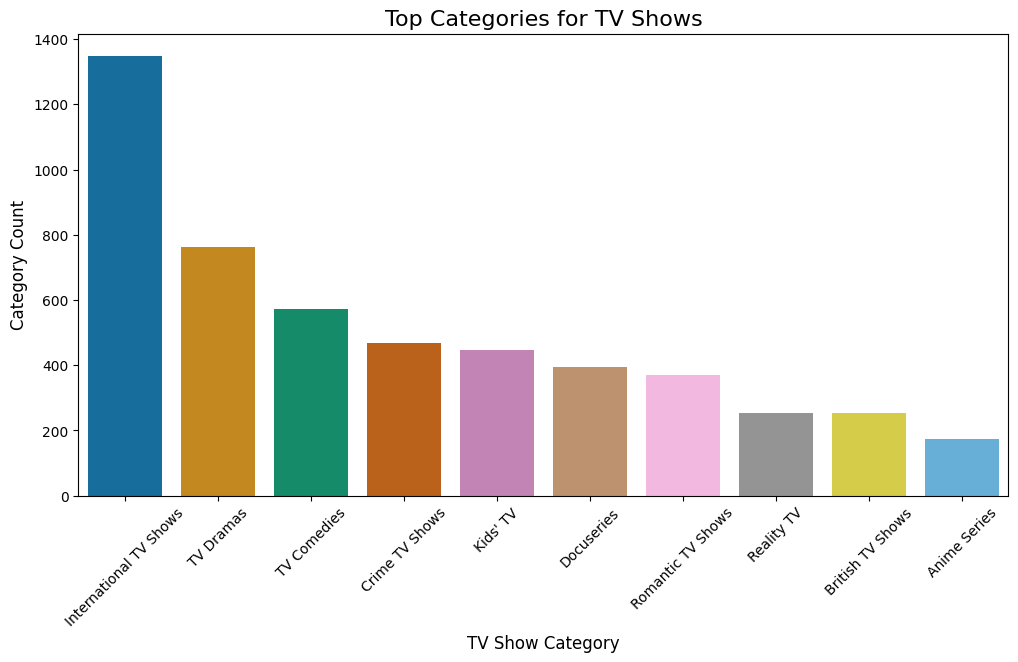

In [21]:
# Visualize top categories for TV shows
plt.figure(figsize=(12, 6))
sns.barplot(x=tv_categories.head(10).index, y=tv_categories.head(10).values, palette='colorblind')

# # Get the bar container object (assuming you want to highlight the first bar)
# bars = plt.gca().patches

# # Set the color of the first bar (index 0) to the highlight color
# bars[1].set_facecolor('red')
# bars[3].set_facecolor('red')

plt.title('Top Categories for TV Shows', fontsize=16)
plt.xlabel('TV Show Category', fontsize=12)
plt.ylabel('Category Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## The most rating for contents added after 2018

In [22]:
# Filter data for recent years (2018 onwards)
recent_years = data[data['date_added'].dt.year >= 2018]
rating_counts = recent_years['rating'].value_counts()

In [23]:
recent_years.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [24]:
rating_counts

rating
TV-MA       2546
TV-14       1709
R            715
TV-PG        625
PG-13        456
PG           258
TV-Y         253
TV-Y7        241
TV-G         181
G             33
NR            18
UR             2
TV-Y7-FV       2
NC-17          1
Name: count, dtype: int64

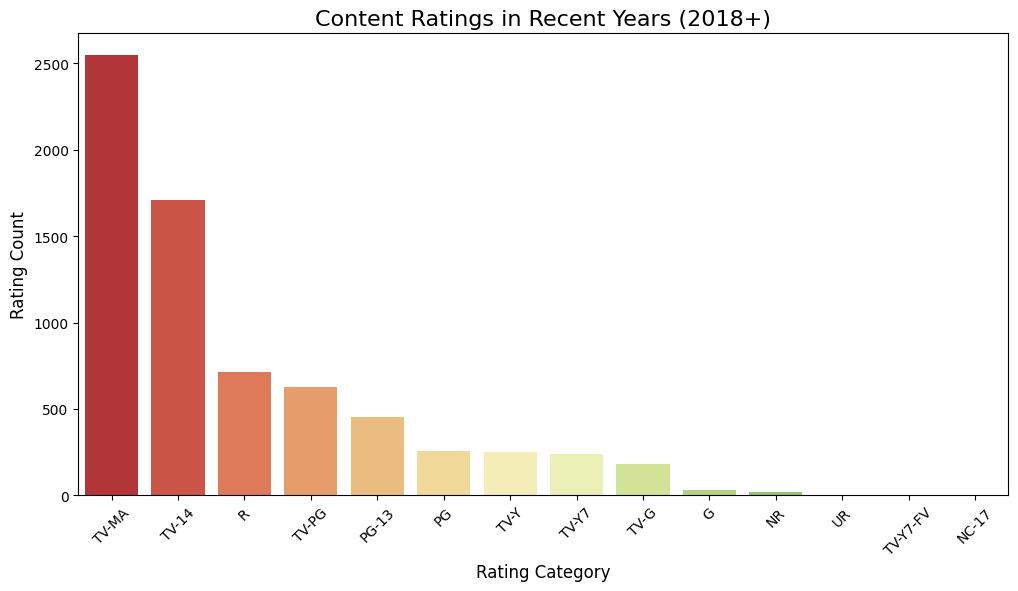

In [25]:
# Visualize ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='RdYlGn')
plt.title('Content Ratings in Recent Years (2018+)', fontsize=16)
plt.xlabel('Rating Category', fontsize=12)
plt.ylabel('Rating Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Top 10 directors with the most releases

In [26]:
# Filter for TV shows and count categories
# tv_shows = data[data['type'] == 'TV Show']
directors = data['director'].str.split(', ').explode().value_counts().sort_values(ascending=False)
directors = directors[directors.index != 'Not Given']
directors

director
Rajiv Chilaka          23
Jan Suter              21
Raúl Campos            19
Alastair Fothergill    19
Marcus Raboy           16
                       ..
Karey Kirkpatrick       1
Tony Leondis            1
Eugenio Derbez          1
Michael Gallagher       1
Mozez Singh             1
Name: count, Length: 4991, dtype: int64

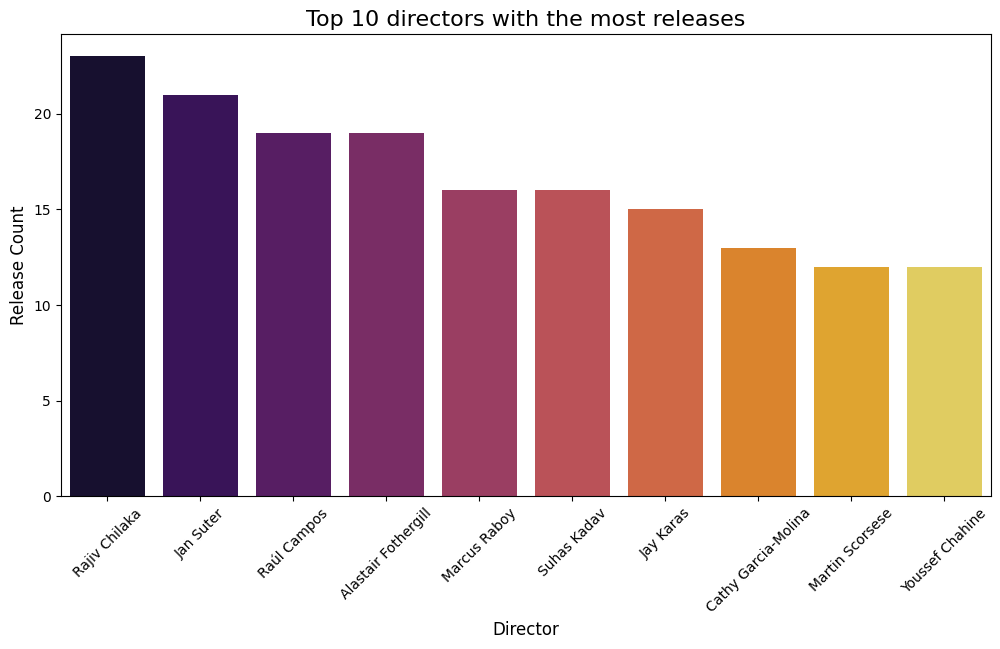

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=directors.head(10).index, y=directors.head(10).values, palette='inferno')
plt.title('Top 10 directors with the most releases', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Release Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Top 10 release countries

In [28]:
# Filter for TV shows and count categories
# tv_shows = data[data['type'] == 'TV Show']
countries = data['country'].value_counts().sort_values(ascending=False)
countries = countries[countries.index != "Not Given"]
countries.head(10)

country
United States     3240
India             1057
United Kingdom     638
Pakistan           420
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Name: count, dtype: int64

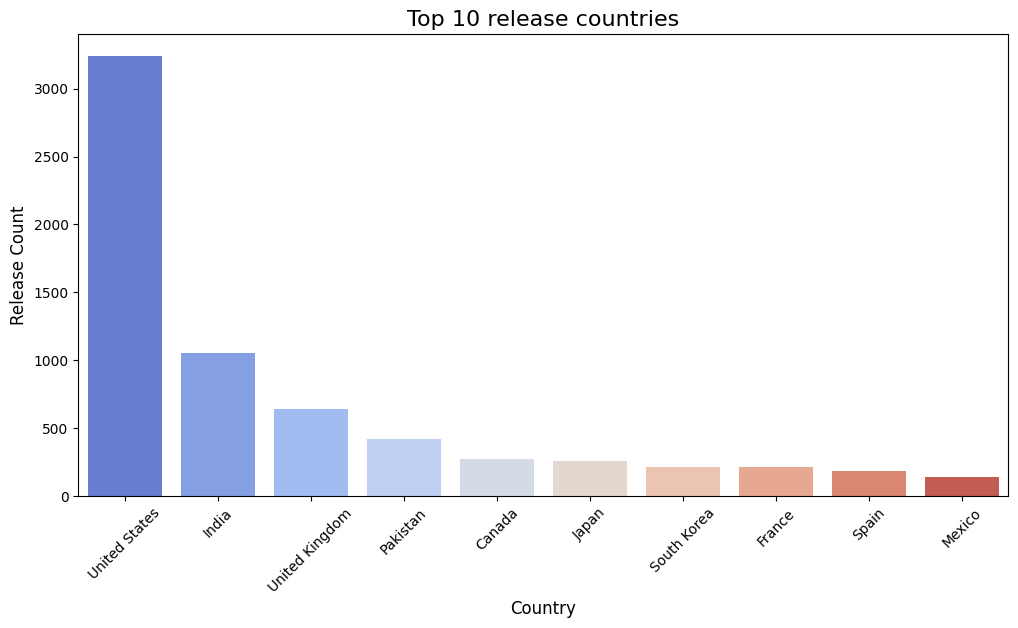

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=countries.head(10).index, y=countries.head(10).values, palette='coolwarm')
plt.title('Top 10 release countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Release Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Hypothesis Testing

## Hypothesis 1: Netflix releases more movies than TV shows annually

Here I'll use Chi-Square Test for Movies vs TV Shows counts per year

In [30]:
hypothesis_1 = data.groupby(['release_year', 'type']).size().unstack().fillna(0).astype(int)
chi2_stat, p_val_h1, dof, expected = chi2_contingency(hypothesis_1.T)


In [31]:
print(f"Hypothesis 1 (Movies vs TV Shows): p-value = {p_val_h1}")

Hypothesis 1 (Movies vs TV Shows): p-value = 7.380333058037853e-74


## Hypothesis 2: TV Shows are predominantly categorized under "Crime".

I used Chi-Square Test for top TV show categories ("Crime" vs others)

In [32]:
tv_shows = data[data['type'] == 'TV Show']
tv_categories = tv_shows['listed_in'].str.split(', ').explode().value_counts()
crime_drama_counts = tv_categories.get('Crime TV Shows', 0) + tv_categories.get('TV Dramas', 0)
other_categories_count = tv_categories.sum() - crime_drama_counts
observed_h2 = [crime_drama_counts, other_categories_count]
chi2_stat_h2, p_val_h2, dof_h2, expected_h2 = chi2_contingency([observed_h2, [1, 1]])


In [33]:
print(f"Hypothesis 2 (Crime/Drama categories): p-value = {p_val_h2}")

Hypothesis 2 (Crime/Drama categories): p-value = 0.8646191143101718


## Hypothesis 3: Most content added in recent years is rated "TV-MA".
I used the Proportion Test for "TV-MA" frequency

In [34]:
recent_years = data[data['date_added'].dt.year >= 2018]
rating_counts = recent_years['rating'].value_counts()
tv_ma_count = rating_counts.get('TV-MA', 0)
other_ratings_count = rating_counts.sum() - tv_ma_count
count_h3 = [tv_ma_count, other_ratings_count]
nobs_h3 = [rating_counts.sum(), rating_counts.sum()]
stat_h3, p_val_h3 = proportions_ztest(count_h3, nobs_h3)

In [35]:
print(f"Hypothesis 3 (TV-MA ratings): p-value = {p_val_h3}")

Hypothesis 3 (TV-MA ratings): p-value = 1.9570930437794378e-236
